# Примеры к лекции 2. Спектры импульсных сигналов. 
Лекции по курсу "Дискретные преобразования сигналов", 3 курс ФРКТ МФТИ 

In [63]:
import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot


In [64]:
import scipy.integrate as integrate # импорт модуля численного интегрирования

def integrate_function(t, func, f, tau, real_part=True):
    # Подынтегральное выражение для использованиия в функции integrate.quad
    # t - время
    # func - функция, задающая импульс
    # f - частота
    # tau - константа, используемая для задания длительности импульса
    if real_part:
        return func(t, tau)*np.cos(-2*np.pi*f*t)  # действительная часть интеграла
    else:
        return func(t, tau)*np.sin(-2*np.pi*f*t)  # мнимая часть интеграла
def fourier_transform(signal, f_band, tau, t1, t2, res_type='abs'):
    # вычисление преобразования Фурье для набора частот
    # signal - функция от t и tau, задающая сигнал во временной области 
    # f_band - набор частот, для которых вычисляется преобразование Фурье
    # tau - константа, используемая для задания длительности импульса
    # t1 момент начала сигнала
    # t2 момент завершения сигнала
    # тип возвращаемого значения:
    # res_type='abs' - |X(f)|
    # res_type='Re' - Re X(f)
    # res_type='Im' - Im X(f)
    if res_type=="abs":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return abs(Re+1j*Im)
    elif res_type=="Re":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        return Re
    elif res_type=="Im":
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return Im

In [65]:
# Если используете Jupyter, то можно поменять backend matplotlib на notebook
# %matplotlib notebook
# Для использования backend matplotlib inline, раскомментируйте строку ниже.
%matplotlib inline

## Вычисление спектров численным интегрированием.  Прямоугольный импульс.

In [66]:
def ex1_plots(signal, tau, f_band, t1, t2):    
    t_band=np.linspace(2*t1, 2*t2, 1024)
    plt.figure(figsize=[9, 6])
    plt.subplot(2,2,1)
    plt.plot(t_band*1e6, [signal(t, tau) for t in t_band])
    plt.xlabel("Время $t$, мкс")
    plt.ylabel("$x(t)$, В")
    plt.title("Сигнал")
    plt.tight_layout() 
    plt.grid()

    plt.subplot(2,2,3)
    plt.plot(f_band/1e3, fourier_transform(signal=signal, f_band=f_band, tau=tau, t1=t1, t2=t2, res_type="abs")*1e6)
    plt.xlabel("Частота $f$, кГц")
    plt.ylabel("$|X(f)|$,  мкВ / Гц")
    plt.title("АЧХ")
    plt.tight_layout() 
    plt.grid()
    
    plt.subplot(2,2,2)
    plt.plot(f_band/1e3, fourier_transform(signal=signal, f_band=f_band, tau=tau, t1=t1, t2=t2, res_type="Re")*1e6)
    plt.xlabel("Частота $f$, кГц")
    plt.ylabel("Re $X(f)$,  мкВ / Гц")
    plt.title("Re $X(f)$")
    plt.tight_layout() 
    plt.grid()
    
    plt.subplot(2,2,4)
    plt.plot(f_band/1e3, fourier_transform(signal=signal, f_band=f_band, tau=tau, t1=t1, t2=t2, res_type="Im")*1e6)
    plt.xlabel("Частота $f$, кГц")
    plt.ylabel("Im $X(f)$,  мкВ / Гц")
    plt.title("Im $X(f)$")
    plt.tight_layout() 
    plt.grid()

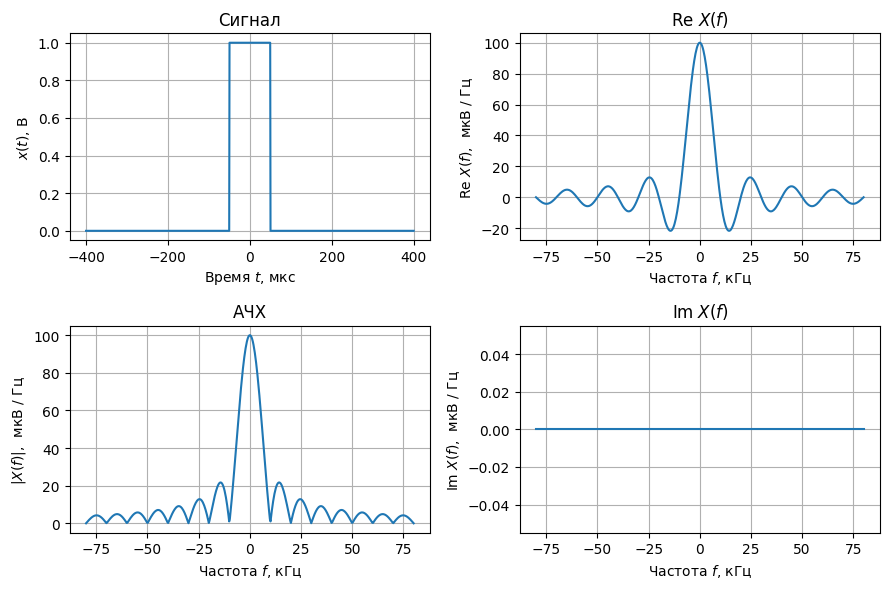

In [67]:
tau=100e-6 #100 мкс
f_band=np.linspace(-8/tau, 8/tau, 500) # 500 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    shift=0
#     shift=tau/4
#     shift=tau/2
    if abs(t-shift)<tau/2:
        return 1.0                 
    else:
        return 0.0      
ex1_plots(signal=boxcar, tau=tau, f_band=f_band, t1=-2*tau, t2=2*tau)

Прямоугольный импульс. 
* Нули функции ${{X}_{\text{}}}\left( f \right)$ — ${{f}_{n}}=\pm \frac{n}{\tau },\ n\in \mathbb{N}$. 
* Главный лепесток на частотах  $f\in [-1/\tau ;\ 1/\tau ]$, ширина главного лепестка $2/\tau $.
* Сдвиг по времени не влияент на $|X(f)|$ (как и для других сигналов).

$$x(t-\tau )\overset{FT}{\mathop{\leftrightarrow }}\,\exp (-j2\pi f\tau )X(f).$$

$$|X(f)| = |\exp (-j2\pi f\tau )X(f)|.$$

## Треугольный импульс как свертка двух прямоугольных 

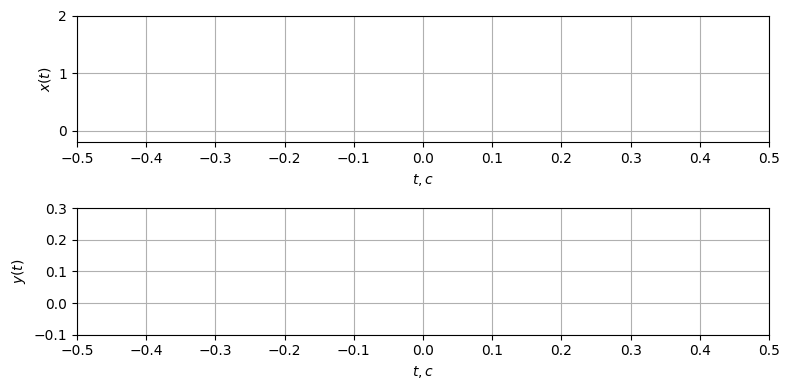

In [68]:
#@title > Code | Теорема о свертке в частотной области

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import rc 
import scipy.integrate

Fs = 500  # our sampling frequency for the plotting
T = 0.5    # the time range we are interested in
t = np.arange(-T, T, 1/Fs)  # the time samples

f1 = lambda t: (abs(t)<0.1).astype(float)
f2 = lambda t: (abs(t)<0.1).astype(float)
f_shift = lambda t: f2(t0-t)
prod = lambda tau: f1(tau) * f2(t0-tau)
prod_p = lambda tau: f1(tau) * f2(t_p-tau)

t0 = np.arange(-0.5,0.5, 0.05)


fig, axs = plt.subplots(2, 1, figsize=[8, 4])

plt.tight_layout()
axs[0].set(xlim=(-0.5, 0.5), ylim=(-0.2, 2))
axs[1].set(xlim=(-0.5, 0.5), ylim=(-0.1, 0.3))
axs[0].set(xticks=np.linspace(-0.5,0.5,11))
axs[1].set(xticks=np.linspace(-0.5,0.5,11))
axs[0].grid()
axs[1].grid()
axs[0].set_xlabel(u'$t, c$')
axs[1].set_xlabel(u'$t, c$')
axs[0].set_ylabel(u'$x(t)$')
axs[1].set_ylabel(u'$y(t)$')

plt.tight_layout()
line, = axs[0].plot([], [], 'g')
line1, = axs[0].plot([], [], 'b')



cnv, = axs[1].plot([], [], 'grey')
cr, = axs[1].plot([], [], 'mo')  # plot the point
ver1, =axs[0].plot([], [], 'y--')
ver2, =axs[0].plot([], [], 'r--')

ver3, =axs[1].plot([], [], 'r--')
ver4, =axs[1].plot([], [], 'y--')
#update_from
def init():

    line.set_data([], [])
    line1.set_data([], [])
    cnv.set_data([], [])
    cr.set_data([], [])
    ver1.set_data([], [])
    ver2.set_data([], [])
    ver3.set_data([], [])
    ver4.set_data([], [])

    return line, line1, cnv, cr, ver1, ver2, ver3, ver4

def animate(i):
    t0=float(i)/100.0-0.5
    

    t_p=float(i-1)/100.0-0.5

    f_shift = lambda t: f2(t0-t)
    prod = lambda tau: f1(tau) * f2(t0-tau)
    prod_p = lambda tau: f1(tau) * f2(t_p-tau)
    line.set_data(t, f1(t))
    line1.set_data(t, f_shift(t))


    axs[0].fill(t, prod_p(t), 'w')
    axs[0].fill(t, prod(t), 'y')


    cr.set_data(t0, scipy.integrate.simps(prod(t), t))

    convolution = np.zeros(len(t))
    for n, t_ in enumerate(t):
        prod = lambda tau: f1(tau) * f2(t_-tau)
        convolution[n] = scipy.integrate.simps(prod(t), t)
    
    cnv.set_data(t, convolution)
    ver2.set_data([t0, t0+0.1/Fs], [-0.2, 2])
    ver1.set_data([0, 0.1/Fs], [-0.2, 2])
    ver3.set_data([t0, t0+0.1/Fs], [-0.2, 2])
    ver4.set_data([0, 0.1/Fs], [-0.2, 2])

    return line, line1, cnv, cr, ver1, ver2, ver3, ver4


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=101, interval=40, blit=True)
#rc('animation', html='jshtml')





In [69]:
anim

AttributeError: module 'scipy.integrate' has no attribute 'simps'

Особенности:
* треугольный импульс в два раза длиннее прямоугольных,
* высота треугольного импульса равна площади одно из прямоугольных.

## Спектр пачки равноотстоящих импульсов

C:\Users\pc\AppData\Local\Temp\ipykernel_20512\2305500954.py:25: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
C:\Users\pc\AppData\Local\Temp\ipykernel_20512\2305500954.py:26: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])


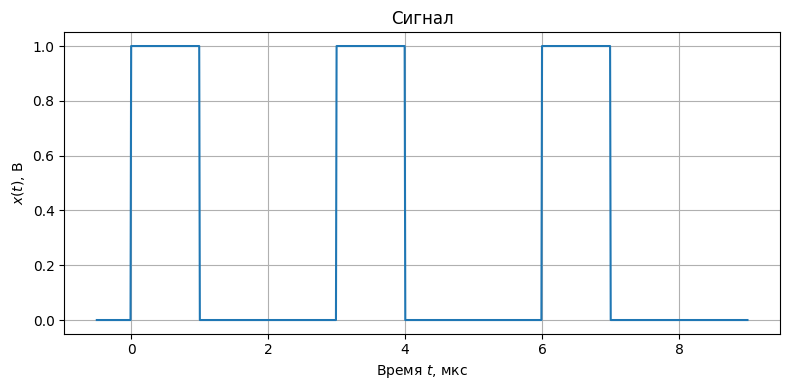

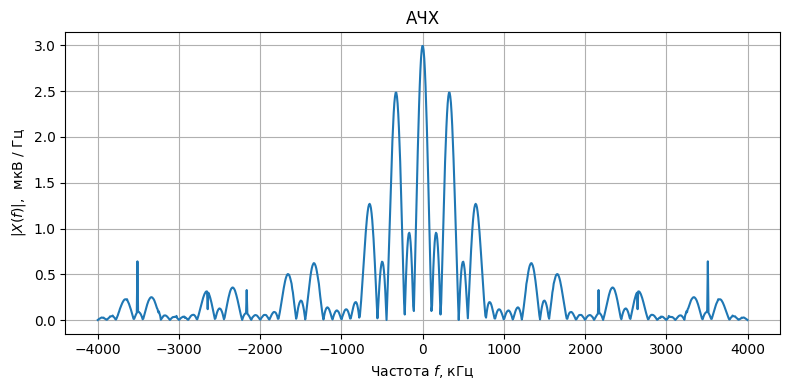

In [70]:
N=3
tau=1e-6 #100 мкс
period = 3e-6 

f_band=np.linspace(-4/tau+1e-9, 4/tau-1e-9, 1000) # 2000 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    
    for n in range(N):
        tau0 = period * n
        tau1 = tau + period * n
        if tau0 < t < tau1:
            return 1 # 0.1 В
    return 0.0 # 0 В
    
t_band=np.linspace(-0.5*tau, N*period, 1024)
plt.figure(figsize=[8, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])

plt.xlabel("Время $t$, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[8, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=0, t2=N*period, res_type="abs")*1e6)
plt.title("АЧХ")
plt.xlabel("Частота $f$, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.tight_layout() 
plt.grid()


## Исследование спектров сигналов с помощью цифрового осциллографа. 
Особенности:
* строится спектр дискретизованного сигнала, отличающийся от спектра налогового, влияет эффект наложения,
* влияют шумы квантования,
* оценка спектра ведется на дискретном наборе точек с помощью дискретного преобразования Фурье,
* для ускорения вычислений используется алгоритм быстрого преобразования Фурье.


In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def analyse(file, const_level=0, window='boxcar'):
    f = open(file)
    str1 = f.read().split('\n')
    f.closed
    plt.rcParams['font.size'] = '12'
    figsize=[8, 4]

    # dt
    val, unit = str1[1].replace(',', '.').split(' ')[3:5]
    val=float(val)
    if unit=='uS':
        val*=1e-6
    elif unit=='nS':
        val*=1e-9
    elif unit=='mS':
        val*=1e-3    
    fs = int(1.0 / val)
    
    #Voltage step 
    val, unit = str1[2].replace(',', '.').split(' ')[3:5]
    dv=float(val)
    if unit=='mV':
        dv*=1e-3  


    # Zero level
    zero_level= int(str1[3].split(' ')[3])
    str_num = len(str1)
    signal_lev = np.empty(shape=(str_num-8), dtype=float)
    for k, u in enumerate(range(7, str_num-1, 1)):
        data = str1[u].split()
        signal_lev[k]=(int(data[1])-zero_level)*dv-const_level
        
    window = signal.get_window(window, Nx=len(signal_lev), fftbins=True)
    signal_lev = signal_lev*window
    plt.figure(figsize=figsize)
    plt.plot(np.arange(signal_lev.size)/fs*1e3, signal_lev, '.-')
    plt.title("Сигнал")
    plt.xlabel("$t$, мc")
    plt.ylabel("$x(k\Delta t)w[k]$, В")
    plt.grid()
    plt.tight_layout()
    Xn = np.fft.fftshift(np.fft.fft(signal_lev, 2**18))
    f = fs*np.linspace(-0.5, 0.5, num=Xn.size, endpoint=False)
#     plt.show()

    plt.figure(figsize=figsize)
    plt.title("ДВПФ (модуль), линейный масштаб")
    plt.plot(f/1e3, abs(Xn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("$|X(f)|$")
    plt.tight_layout()
#     plt.show()

    plt.figure(figsize=figsize)
    maxXn=max(abs(Xn))
    plt.title("ДВПФ (модуль), дБ")
    plt.plot(f/1e3, 20*np.log10(abs(Xn)/maxXn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("АЧХ, дБ")
    plt.tight_layout()
#     plt.show()

In [72]:
analyse(file='b2.txt', const_level=-0.46, window='boxcar')

FileNotFoundError: [Errno 2] No such file or directory: 'b2.txt'